In [1]:
import pickle
import numpy as np 
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(10)

,Glucose,Insulin,BMI,Age,Outcome
0,148,0,33.6,50,1
1,85,0,26.6,31,0
2,183,0,23.3,32,1
3,89,94,28.1,21,0
4,137,168,43.1,33,1
5,116,0,25.6,30,0
6,78,88,31.0,26,1
7,115,0,35.3,29,0
8,197,543,30.5,53,1
9,125,0,0.0,54,1


Data Analysis and Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  768 non-null    int64  
 1   Insulin  768 non-null    int64  
 2   BMI      768 non-null    float64
 3   Age      768 non-null    int64  
 4   Outcome  768 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 30.1 KB


In [4]:
df.describe()


,Glucose,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,79.799479,31.992578,33.240885,0.348958
std,31.972618,115.244002,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,21.000000,0.000000
25%,99.000000,0.000000,27.300000,24.000000,0.000000
50%,117.000000,30.500000,32.000000,29.000000,0.000000
75%,140.250000,127.250000,36.600000,41.000000,1.000000
max,199.000000,846.000000,67.100000,81.000000,1.000000


In [5]:
print(df.shape)
df.isnull().sum()

(768, 5)


Glucose    0
Insulin    0
BMI        0
Age        0
Outcome    0
dtype: int64

NO Null enteries

In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

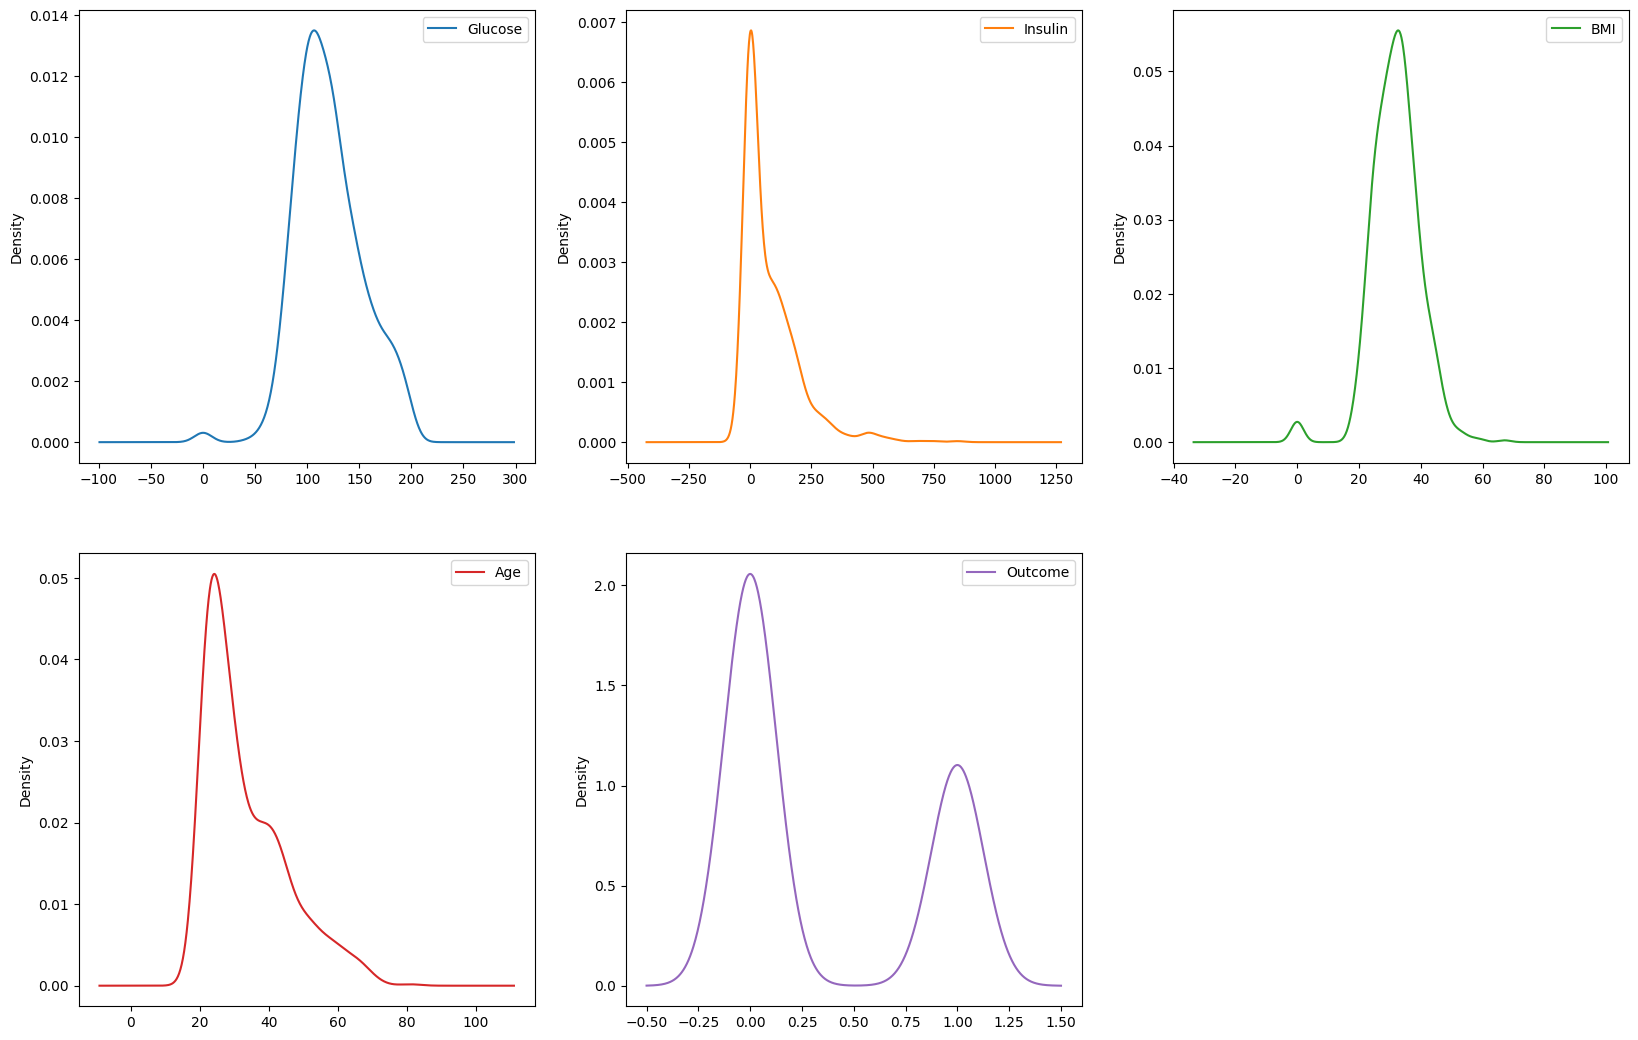

In [7]:
df.plot.kde(subplots=True, layout=(3,3), sharex=False, figsize=(20,20))

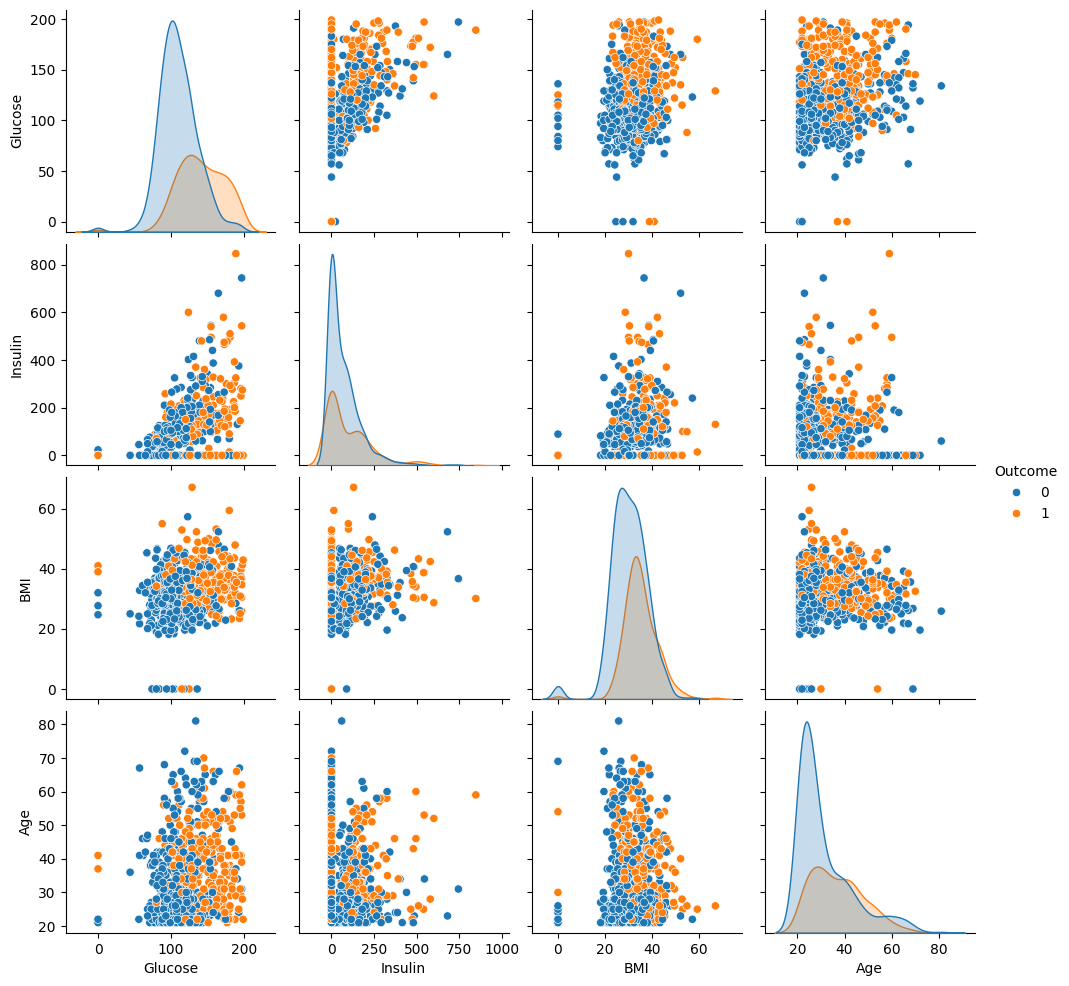

In [8]:
sns.pairplot(df, hue='Outcome')

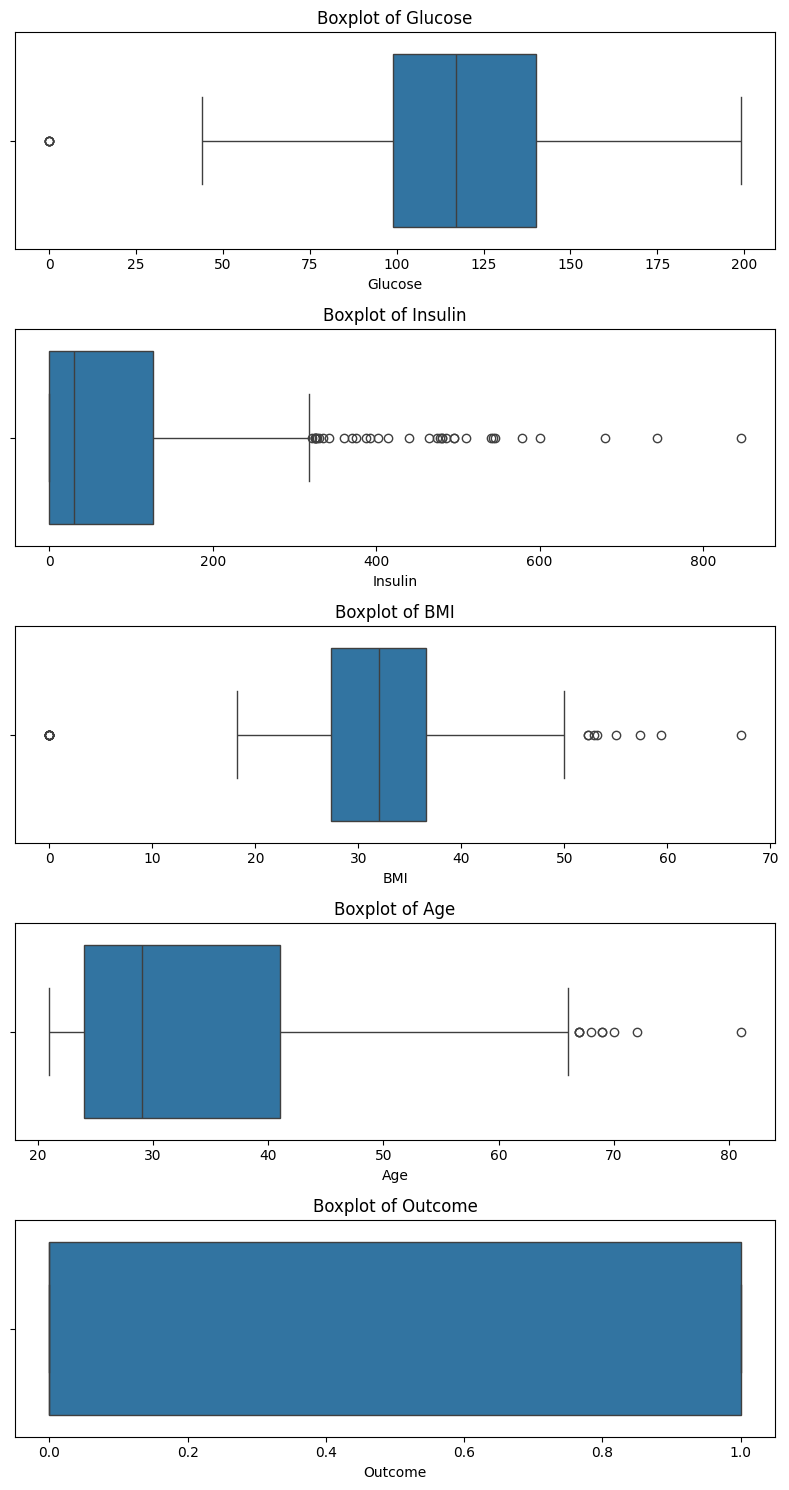

In [9]:
num_columns = len(df.columns)
fig, axes = plt.subplots(nrows=num_columns, figsize=(8, num_columns * 3))

for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [10]:
outliers = {}

for column in df.columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Display outliers
for column, outlier_df in outliers.items():
    print(f"Outliers in {column}:\n", outlier_df)


Outliers in Glucose:
      Glucose  Insulin   BMI  Age  Outcome
75         0        0  24.7   22        0
182        0       23  27.7   21        0
342        0        0  32.0   22        0
349        0        0  41.0   37        1
502        0        0  39.0   41        1
Outliers in Insulin:
      Glucose  Insulin   BMI  Age  Outcome
8        197      543  30.5   53        1
13       189      846  30.1   59        1
54       150      342  34.7   42        0
111      155      495  34.0   46        1
139      105      325  36.9   28        0
153      153      485  40.6   23        0
186      181      495  30.1   60        1
220      177      478  34.6   21        1
228      197      744  36.7   31        0
231      134      370  46.2   46        1
247      165      680  52.3   23        0
248      124      402  35.4   34        0
258      193      375  25.9   24        0
286      155      545  38.7   34        0
296      146      360  28.0   29        1
360      189      325  31.2   29

In [11]:
df_no_outliers = df.copy()

for column in df.columns:
  
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]


print(df_no_outliers)
df = df_no_outliers

     Glucose  Insulin   BMI  Age  Outcome
0        148        0  33.6   50        1
1         85        0  26.6   31        0
2        183        0  23.3   32        1
3         89       94  28.1   21        0
4        137      168  43.1   33        1
..       ...      ...   ...  ...      ...
763      101      180  32.9   63        0
764      122        0  36.8   27        0
765      121      112  26.2   30        0
766      126        0  30.1   47        1
767       93        0  30.4   23        0

[703 rows x 5 columns]


In [12]:
df_no_outliers.isnull().sum()

Glucose    0
Insulin    0
BMI        0
Age        0
Outcome    0
dtype: int64

In [13]:
df_no_outliers.describe()

,Glucose,Insulin,BMI,Age,Outcome
count,703.000000,703.000000,703.000000,703.000000,703.000000
mean,120.032717,64.002845,32.137411,32.897582,0.337127
std,29.714315,79.664414,6.498238,11.063700,0.473065
min,44.000000,0.000000,18.200000,21.000000,0.000000
25%,99.000000,0.000000,27.400000,24.000000,0.000000
50%,115.000000,15.000000,32.000000,29.000000,0.000000
75%,138.000000,116.000000,36.300000,40.000000,1.000000
max,199.000000,318.000000,50.000000,66.000000,1.000000


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

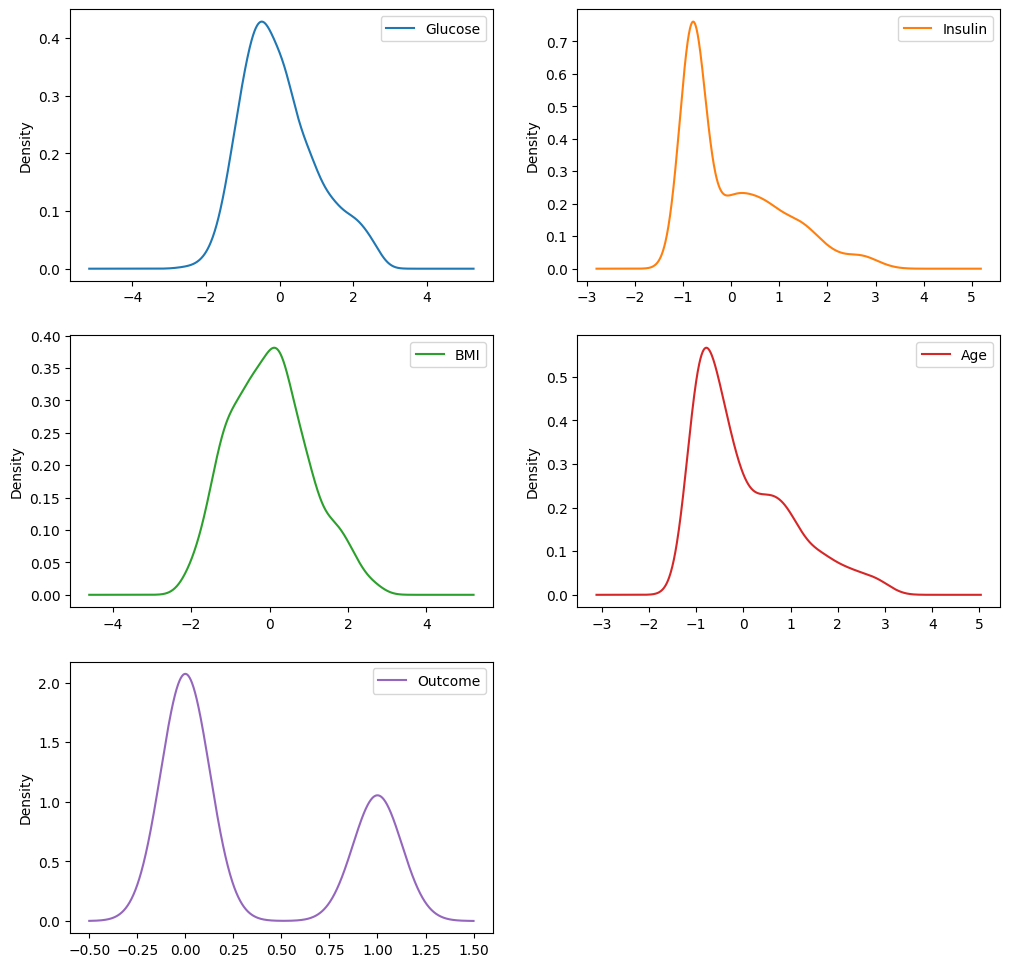

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df_no_outliers.drop('Outcome', axis=1)
y = df_no_outliers['Outcome']
df1 = scaler.fit_transform(X)
df1 = pd.DataFrame(df1, columns=X.columns)
df1['Outcome'] = y.values
df1.head()

df1.plot.kde(subplots=True, layout=(3,2), figsize=(12, 12), sharex=False)

In [15]:
df1.isnull().sum()
df_scaled=df1



array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

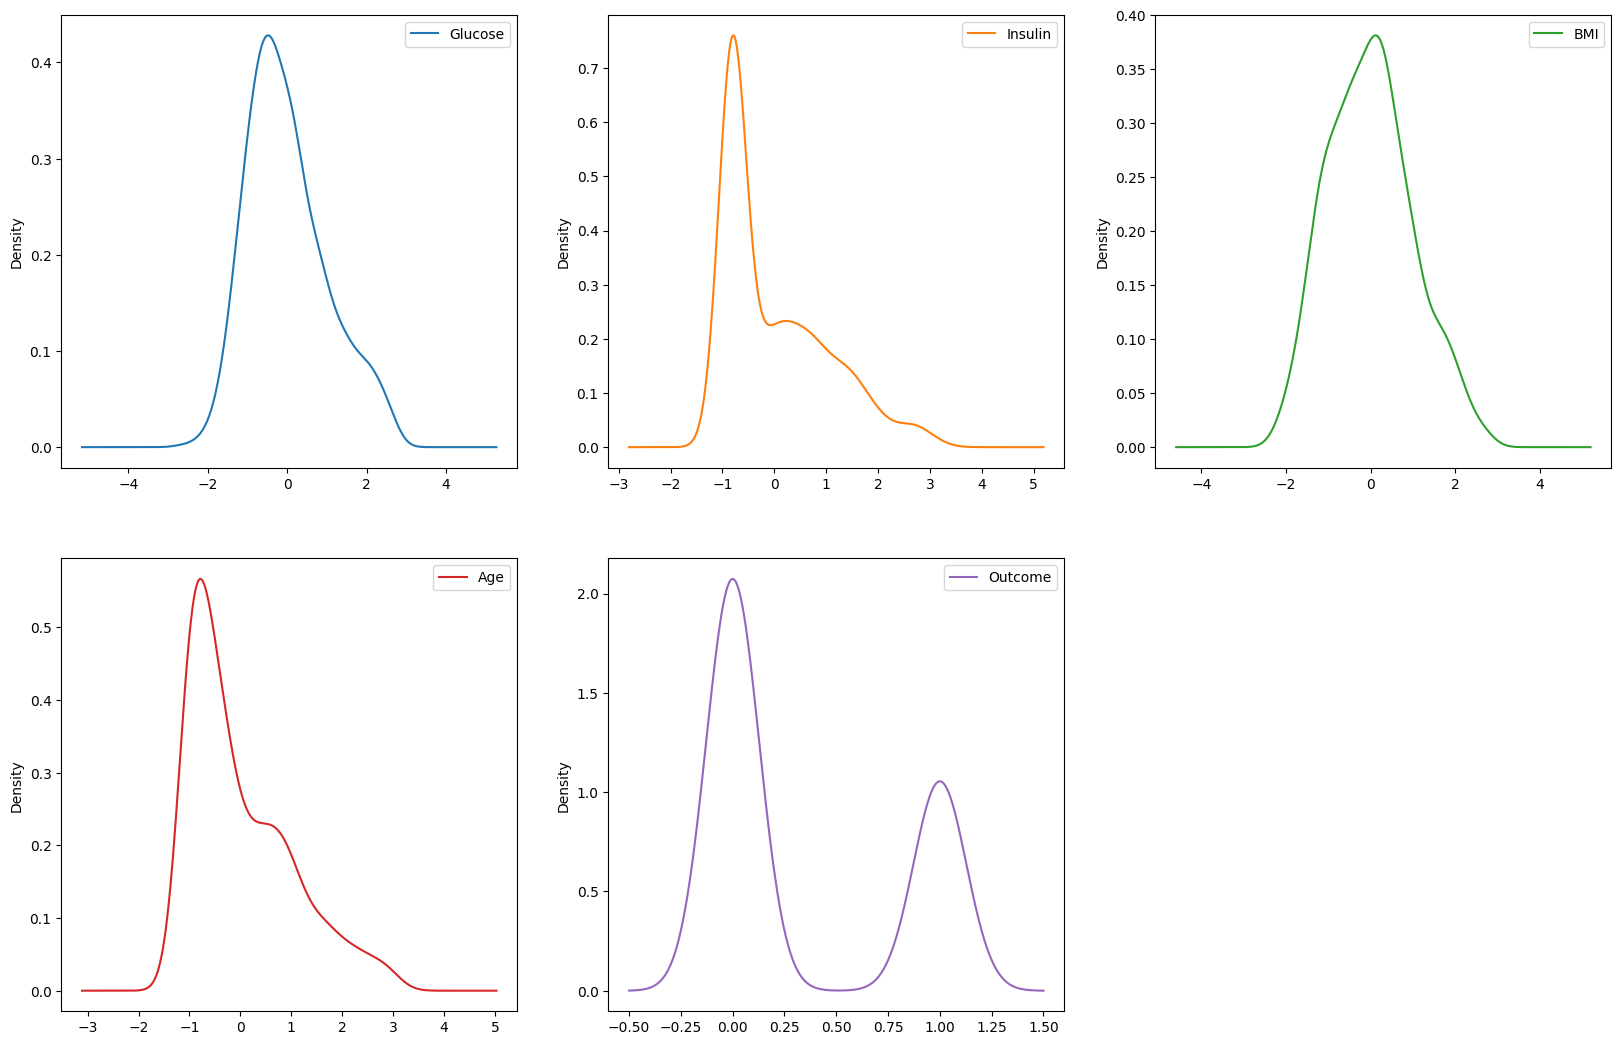

In [16]:
df_scaled.plot.kde(subplots=True, layout=(3,3), sharex=False, figsize=(20,20))

In [17]:
df_scaled

,Glucose,Insulin,BMI,Age,Outcome
0,0.941876,-0.803978,0.225235,1.546914,1
1,-1.179824,-0.803978,-0.852747,-0.171636,0
2,2.120598,-0.803978,-1.360939,-0.081186,1
3,-1.045113,0.376812,-0.621751,-1.076137,0
4,0.571420,1.306370,1.688210,0.009264,1
...,...,...,...,...,...
698,-0.640980,1.457109,0.117437,2.722765,0
699,0.066254,-0.803978,0.718027,-0.533436,0
700,0.032576,0.602921,-0.914346,-0.262086,0
701,0.200965,-0.803978,-0.313756,1.275564,1


In [18]:
df_scaled.isnull().sum()

Glucose    0
Insulin    0
BMI        0
Age        0
Outcome    0
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
y_train.value_counts()

Outcome
0    370
1    192
Name: count, dtype: int64

In [21]:
import pandas as pd

# Check if y_train contains any NaN values
print("NaN values in y_train:", y_test.isnull().any())

# Count the number of NaN values in y_train
print("Count of NaN values in y_train:", y_test.isnull().sum())


NaN values in y_train: False
Count of NaN values in y_train: 0


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
naive_baeyes_model = GaussianNB(var_smoothing=1e-09, priors=[0.62, 0.38])
naive_baeyes_model.fit(X_train, y_train)
y_pred = naive_baeyes_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))



Accuracy: 0.7446808510638298
Precision: 0.5957446808510638
Recall: 0.6222222222222222
F1 Score: 0.6086956521739131


In [23]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

# Grid search with cross-validation
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameter and score
print("Best var_smoothing:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best var_smoothing: {'var_smoothing': 1e-09}
Best cross-validation accuracy: 0.7562420986093553


In [24]:
Perceptron_model = Perceptron()
Perceptron_model.fit(X_train, y_train)
y_pred = Perceptron_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.5460992907801419
Precision: 0.3333333333333333
Recall: 0.4222222222222222
F1 Score: 0.37254901960784315


In [25]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'penalty': ['l2', 'l1', None],
    'alpha': [1e-4, 1e-3, 1e-2],
    'max_iter': [500, 1000, 2000],
    'tol': [1e-3, 1e-4],
    'eta0': [0.001,0.1, 1.0]
}

# Grid search with cross-validation
grid_search = GridSearchCV(Perceptron(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters: {'alpha': 0.001, 'eta0': 0.001, 'max_iter': 500, 'penalty': 'l1', 'tol': 0.0001}
Best cross-validation accuracy: 0.7437737041719343


c:\Users\dell\OneDrive\Desktop\ACADS\ML\nlp assignmnet\myenv\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [26]:
Perceptron_model = Perceptron(alpha=0.001,eta0=0.01,max_iter=100,penalty='l1',tol=0.001)
Perceptron_model.fit(X_train, y_train)
y_pred = Perceptron_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7092198581560284
Precision: 0.5416666666666666
Recall: 0.5777777777777777
F1 Score: 0.5591397849462365


In [27]:
import numpy as np

class CustomPerceptron:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def _unit_step_function(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training the model
        for _ in range(self.max_iter):
            for idx, x_i in enumerate(X):
            
                linear_output = np.dot(x_i, self.weights) + self.bias
                
                y_predicted = self._unit_step_function(linear_output)

                
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        
        linear_output = np.dot(X, self.weights) + self.bias
        return self._unit_step_function(linear_output)


In [28]:
y_train = y_train.to_numpy(dtype='int')
X_train = X_train.astype('float64')
y_train = y_train.astype('int64')




In [29]:
import numpy as np

class CustomPerceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training loop
        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.where(linear_output >= 0, 1, 0)  # Step function

                # Update rule
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.where(linear_output >= 0, 1, 0)
        return y_predicted

# Initialize and fit the custom model
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
y_train = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
model = CustomPerceptron(learning_rate=0.01, n_iter=1000)


model.fit(X_train, y_train)


y_pred_custom = model.predict(X_test)

In [30]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))
print("F1 Score:", f1_score(y_test, y_pred_custom))

Accuracy: 0.6879432624113475
Precision: 0.5151515151515151
Recall: 0.37777777777777777
F1 Score: 0.4358974358974359


In [31]:
import pickle

# Save the Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as nb_file:
    pickle.dump(naive_baeyes_model, nb_file)

# Save the Perceptron model
with open('perceptron_model.pkl', 'wb') as perc_file:
    pickle.dump(Perceptron_model, perc_file)



# Save the custom Perceptron model
with open('custom_perceptron_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Models saved successfully.")


Models saved successfully.
